In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


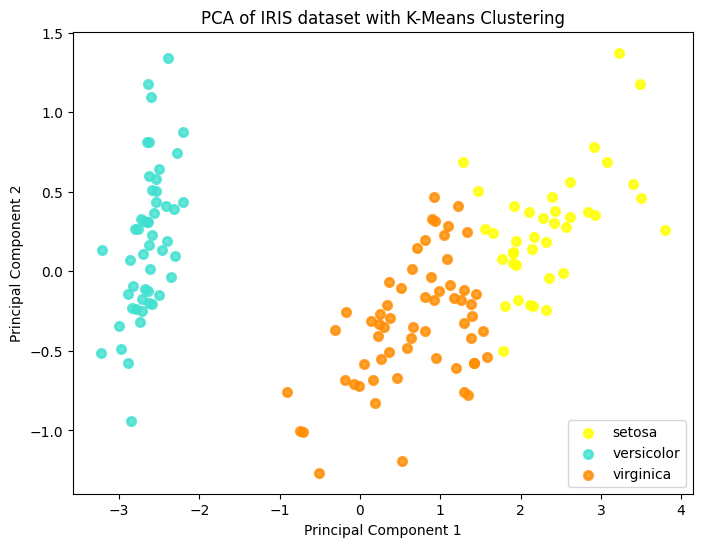

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # The feature matrix

# Apply PCA to reduce from 4 features to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering with 3 clusters (as we know there are 3 species in the Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Plotting the results
plt.figure(figsize=(8, 6))
colors = ['yellow', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

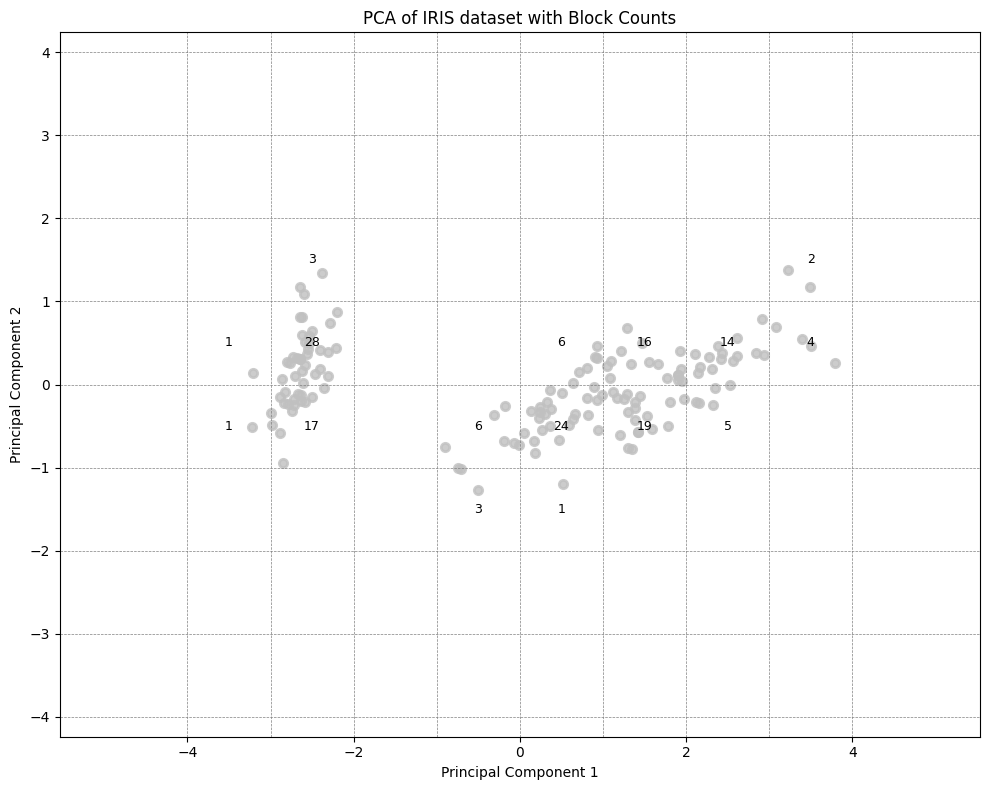

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # The feature matrix

# Apply PCA to reduce from 4 features to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the PCA-transformed points and adding counts per block
plt.figure(figsize=(10, 8))

# Plot points
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='silver', alpha=.8, lw=2)

# Adding coordinate lines for both x and y axes
for line in range(-4, 5):  # Lines for -4 to 4
    plt.axhline(line, color='grey', linestyle='--', lw=0.5)
    plt.axvline(line, color='grey', linestyle='--', lw=0.5)

# Calculate the number of points per 1x1 block and annotate
x_min, x_max = -4, 4
y_min, y_max = -2, 1.5
x_edges = np.arange(x_min, x_max+1, 1)
y_edges = np.arange(y_min, y_max+1, 1)
H, xedges, yedges = np.histogram2d(X_pca[:,0], X_pca[:,1], bins=(x_edges, y_edges))

# Annotate each block with the count of points
for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        block_center_x = (xedges[i] + xedges[i+1]) / 2
        block_center_y = (yedges[j] + yedges[j+1]) / 2
        count = H[i, j]
        if count > 0:  # Only annotate blocks with at least one point
            plt.text(block_center_x, block_center_y, int(count), ha='center', va='center', fontsize=9)

# Setting the plot limits and labels
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])

plt.title('PCA of IRIS dataset with Block Counts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axis('equal')
plt.tight_layout()
plt.show()

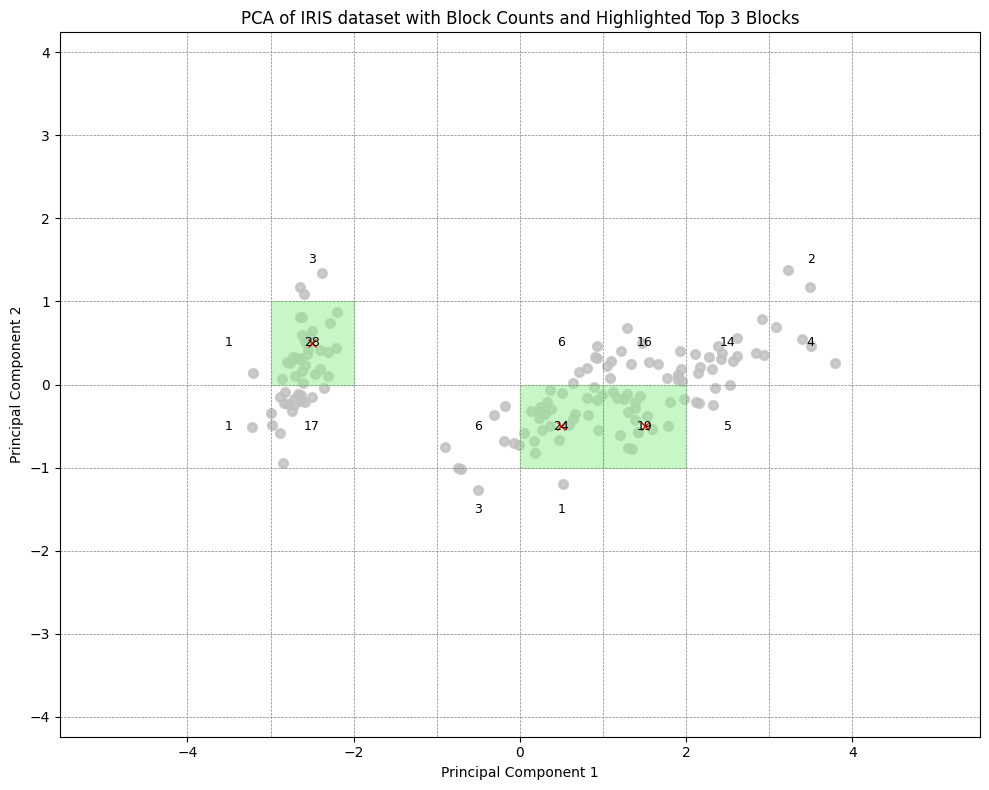

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # The feature matrix

# Apply PCA to reduce from 4 features to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the PCA-transformed points, adding counts per block, and highlighting top 3 blocks
plt.figure(figsize=(10, 8))

# Plot points
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='silver', alpha=.8, lw=2)

# Adding coordinate lines for both x and y axes
for line in range(-4, 5):  # Lines for -4 to 4
    plt.axhline(line, color='grey', linestyle='--', lw=0.5)
    plt.axvline(line, color='grey', linestyle='--', lw=0.5)

# Calculate the number of points per 1x1 block
x_min, x_max = -4, 4
y_min, y_max = -2, 1.5
x_edges = np.arange(x_min, x_max+1, 1)
y_edges = np.arange(y_min, y_max+1, 1)
H, xedges, yedges = np.histogram2d(X_pca[:,0], X_pca[:,1], bins=(x_edges, y_edges))

# Find the indices of the 3 highest counts in H and highlight those blocks
highest_counts_indices = np.unravel_index(np.argsort(H.ravel())[-3:], H.shape)
for i, j in zip(highest_counts_indices[0], highest_counts_indices[1]):
    plt.fill_betweenx(y=[yedges[j], yedges[j+1]], x1=xedges[i], x2=xedges[i+1], color='lightgreen', alpha=0.5)
    # Calculate and plot the centroid of each highlighted block
    centroid_x = (xedges[i] + xedges[i+1]) / 2
    centroid_y = (yedges[j] + yedges[j+1]) / 2
    plt.plot(centroid_x, centroid_y, 'rx')  # Mark the centroid with a red "x"

# Annotate each block with the count of points
for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        block_center_x = (xedges[i] + xedges[i+1]) / 2
        block_center_y = (yedges[j] + yedges[j+1]) / 2
        count = H[i, j]
        if count > 0:  # Only annotate blocks with at least one point
            plt.text(block_center_x, block_center_y, int(count), ha='center', va='center', fontsize=9)

# Setting the plot limits and labels
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])

plt.title('PCA of IRIS dataset with Block Counts and Highlighted Top 3 Blocks')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axis('equal')
plt.tight_layout()
plt.show()

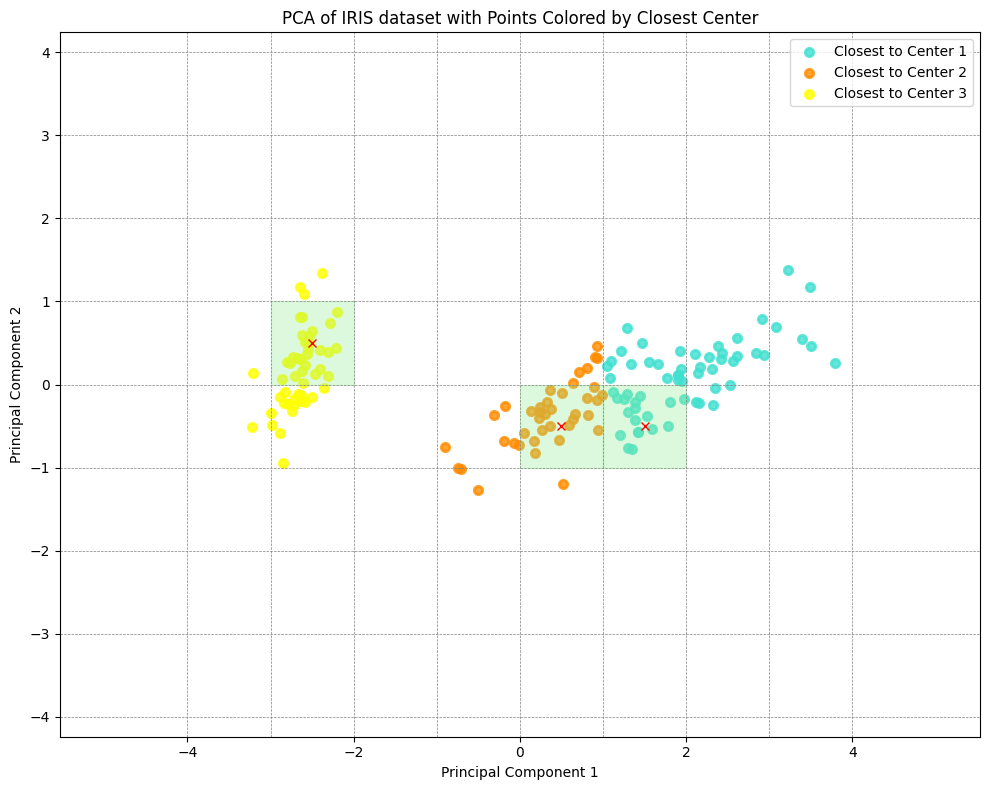

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # The feature matrix

# Apply PCA to reduce from 4 features to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Calculate the number of points per 1x1 block
x_min, x_max = -4, 4
y_min, y_max = -2, 1.5
x_edges = np.arange(x_min, x_max+1, 1)
y_edges = np.arange(y_min, y_max+1, 1)
H, xedges, yedges = np.histogram2d(X_pca[:,0], X_pca[:,1], bins=(x_edges, y_edges))

# Find the indices of the 3 highest counts in H and their centers
highest_counts_indices = np.unravel_index(np.argsort(H.ravel())[-3:], H.shape)
centers = np.array([[(xedges[i] + xedges[i+1]) / 2, (yedges[j] + yedges[j+1]) / 2] for i, j in zip(highest_counts_indices[0], highest_counts_indices[1])])

# Calculate the distance of each point to the centers
distances = cdist(X_pca, centers)
closest_center_indices = np.argmin(distances, axis=1)

# Plotting with points colored based on closest center
plt.figure(figsize=(10, 8))
color_map = ['turquoise', 'darkorange', 'yellow']
for i, center in enumerate(centers):
    # Points closest to this center
    points_closest = X_pca[closest_center_indices == i]
    plt.scatter(points_closest[:, 0], points_closest[:, 1], color=color_map[i], alpha=.8, lw=2, label=f'Closest to Center {i+1}')

# Highlight the top 3 blocks
for i, (x, y) in zip(range(3), centers):
    plt.fill_betweenx(y=[yedges[highest_counts_indices[1][i]], yedges[highest_counts_indices[1][i]+1]], x1=xedges[highest_counts_indices[0][i]], x2=xedges[highest_counts_indices[0][i]+1], color='lightgreen', alpha=0.3)
    plt.plot(x, y, 'rx')  # Mark the centroid with a red "x"

# Adding coordinate lines for both x and y axes
for line in range(-4, 5):
    plt.axhline(line, color='grey', linestyle='--', lw=0.5)
    plt.axvline(line, color='grey', linestyle='--', lw=0.5)

# Setting the plot limits and labels
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('PCA of IRIS dataset with Points Colored by Closest Center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

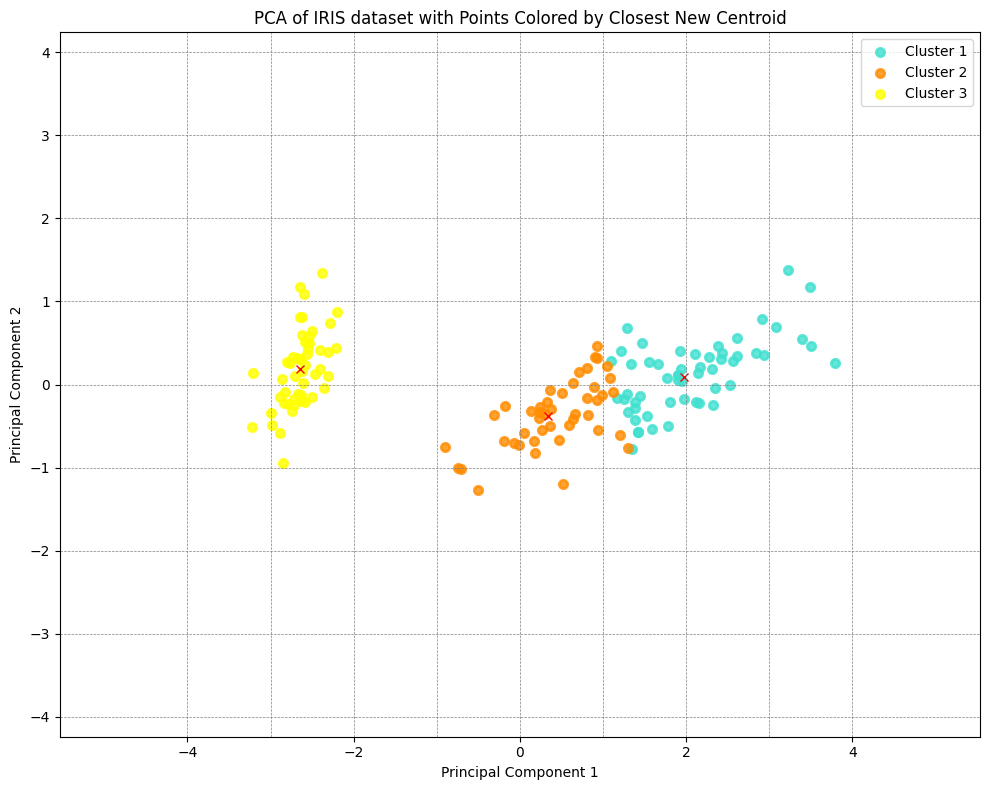

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # The feature matrix

# Apply PCA to reduce from 4 features to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Initial steps are skipped for brevity; assume closest_center_indices is available

# Define cluster labels based on the original description
cluster_labels = np.array(['yellow', 'orange', 'turquoise'])[closest_center_indices]

# Recalculate the centroids based on the freshly made clusters
new_centroids = np.array([X_pca[cluster_labels == color].mean(axis=0) for color in ['yellow', 'orange', 'turquoise']])

# Calculate the distance of each point to the new centroids
distances_to_new_centroids = cdist(X_pca, new_centroids)
closest_center_indices_to_new_centroids = np.argmin(distances_to_new_centroids, axis=1)

# Plotting with points colored based on closest new centroid
plt.figure(figsize=(10, 8))
color_map = ['turquoise', 'darkorange', 'yellow']  # Reversed to match the cluster labeling
for i, color in enumerate(color_map):
    # Points closest to this new centroid
    points_closest = X_pca[closest_center_indices_to_new_centroids == i]
    plt.scatter(points_closest[:, 0], points_closest[:, 1], color=color, alpha=.8, lw=2, label=f'Cluster {i+1}')

# Mark the new centroids with a red "x"
for x, y in new_centroids:
    plt.plot(x, y, 'rx')

# Adding coordinate lines for both x and y axes
for line in range(-4, 5):
    plt.axhline(line, color='grey', linestyle='--', lw=0.5)
    plt.axvline(line, color='grey', linestyle='--', lw=0.5)

# Setting the plot limits and labels
plt.xlim([-4, 4])
plt.ylim([-2, 1.5])
plt.title('PCA of IRIS dataset with Points Colored by Closest New Centroid')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

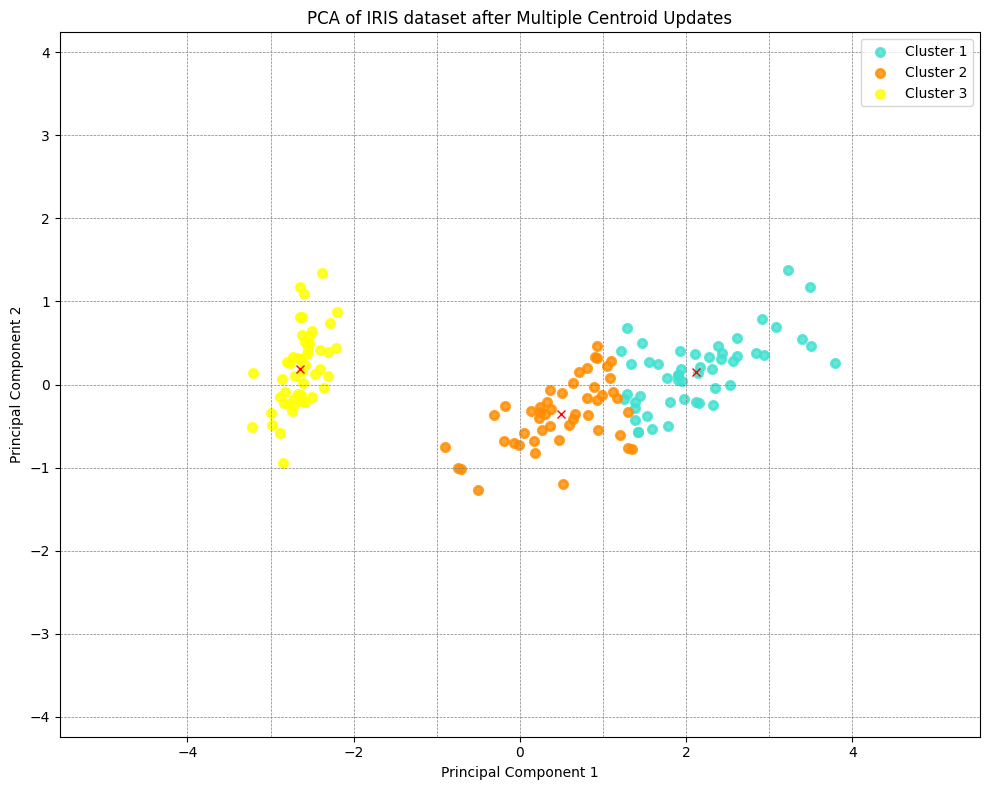

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # The feature matrix

# Apply PCA to reduce from 4 features to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Assuming initial closest_center_indices and color_map are defined
color_map = ['turquoise', 'darkorange', 'yellow']

# Initialize with initial centroids calculation as done previously
new_centroids = np.array([X_pca[closest_center_indices == i].mean(axis=0) for i in range(3)])

# Repeat the process of recalculating centroids and reassigning points 2 more times
for iteration in range(2):
    # Calculate the distance of each point to the new centroids and find the closest one
    distances_to_new_centroids = cdist(X_pca, new_centroids)
    closest_center_indices_to_new_centroids = np.argmin(distances_to_new_centroids, axis=1)
    
    # Recalculate the centroids based on the freshly made clusters
    new_centroids = np.array([X_pca[closest_center_indices_to_new_centroids == i].mean(axis=0) for i in range(3)])

# After final iteration, plot the points colored by their last assigned cluster
plt.figure(figsize=(10, 8))
for i, color in enumerate(color_map):
    points_closest = X_pca[closest_center_indices_to_new_centroids == i]
    plt.scatter(points_closest[:, 0], points_closest[:, 1], color=color, alpha=.8, lw=2, label=f'Cluster {i+1}')

# Mark the final centroids with a red "x"
for x, y in new_centroids:
    plt.plot(x, y, 'rx')

# Adding coordinate lines for both x and y axes
for line in range(-4, 5):
    plt.axhline(line, color='grey', linestyle='--', lw=0.5)
    plt.axvline(line, color='grey', linestyle='--', lw=0.5)

# Setting the plot limits and labels
plt.xlim([-4, 4])
plt.ylim([-2, 1.5])
plt.title('PCA of IRIS dataset after Multiple Centroid Updates')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode

# True labels of the Iris dataset
true_labels = iris.target

# Assuming 'closest_center_indices_to_new_centroids' contains the final cluster assignments
# Map cluster assignments to actual labels
mapped_labels = np.zeros_like(closest_center_indices_to_new_centroids)
for i in range(3):
    mask = (closest_center_indices_to_new_centroids == i)
    # Find the most common true label in each cluster
    mapped_labels[mask] = mode(true_labels[mask])[0]

# Calculate "accuracy"
accuracy = accuracy_score(true_labels, mapped_labels)
print(f'Accuracy: {accuracy:.4f}')

# It's recommended to use a clustering-specific metric like ARI
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(true_labels, closest_center_indices_to_new_centroids)
print(f'Adjusted Rand Index: {ari_score:.4f}')

Accuracy: 0.9267
Adjusted Rand Index: 0.8015


This code snippet is designed to evaluate the performance of a clustering algorithm against the true labels of the Iris dataset. Let's break down its key components:

Importing Necessary Libraries and Functions
confusion_matrix, accuracy_score: Functions from sklearn.metrics used to compute the confusion matrix and accuracy score, respectively, which compare the true labels to predicted labels.
mode: A function from scipy.stats used to find the most common element (the mode) in an array. It's useful for mapping the most frequent true label in each cluster.
Setup
true_labels = iris.target: Extracts the true labels of the Iris dataset.
Mapping Cluster Assignments to Actual Labels
A new array, mapped_labels, is initialized to store labels after mapping cluster assignments to the actual labels. It has the same shape as closest_center_indices_to_new_centroids, which contains the cluster assignments from the clustering algorithm.
Loop for Label Mapping
For each cluster (i ranging from 0 to 2, assuming there are 3 clusters in total), the code identifies data points belonging to that cluster (mask = (closest_center_indices_to_new_centroids == i)).
It then finds the most common true label among those points (mode(true_labels[mask])[0]). This step assumes that the best representative label for each cluster is the most frequent actual label in that cluster.
The identified label is then assigned to all points in mapped_labels that belong to the current cluster.
Calculating "Accuracy"
accuracy = accuracy_score(true_labels, mapped_labels): Calculates the accuracy by comparing the true labels of the dataset with the mapped_labels, which now represent the predicted labels after the heuristic mapping. This gives a sense of how well the clusters correspond to the actual classes in the dataset.
Calculating Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, closest_center_indices_to_new_centroids): Computes the Adjusted Rand Index between the true labels and the original cluster assignments. ARI is a more appropriate measure for the quality of clustering as it does not require a direct label match and accounts for chance groupings. It ranges from -1 (no agreement) to 1 (perfect agreement), with 0 indicating random clustering.
Summary
This code essentially attempts to evaluate the clustering result in two ways:

Heuristic "Accuracy": By mapping clusters to the most common true label within them and then calculating accuracy, which is a bit unconventional for clustering tasks since it forces a label alignment not inherent in unsupervised learning.
Adjusted Rand Index (ARI): A more standard and suitable measure for clustering evaluation, which considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters.

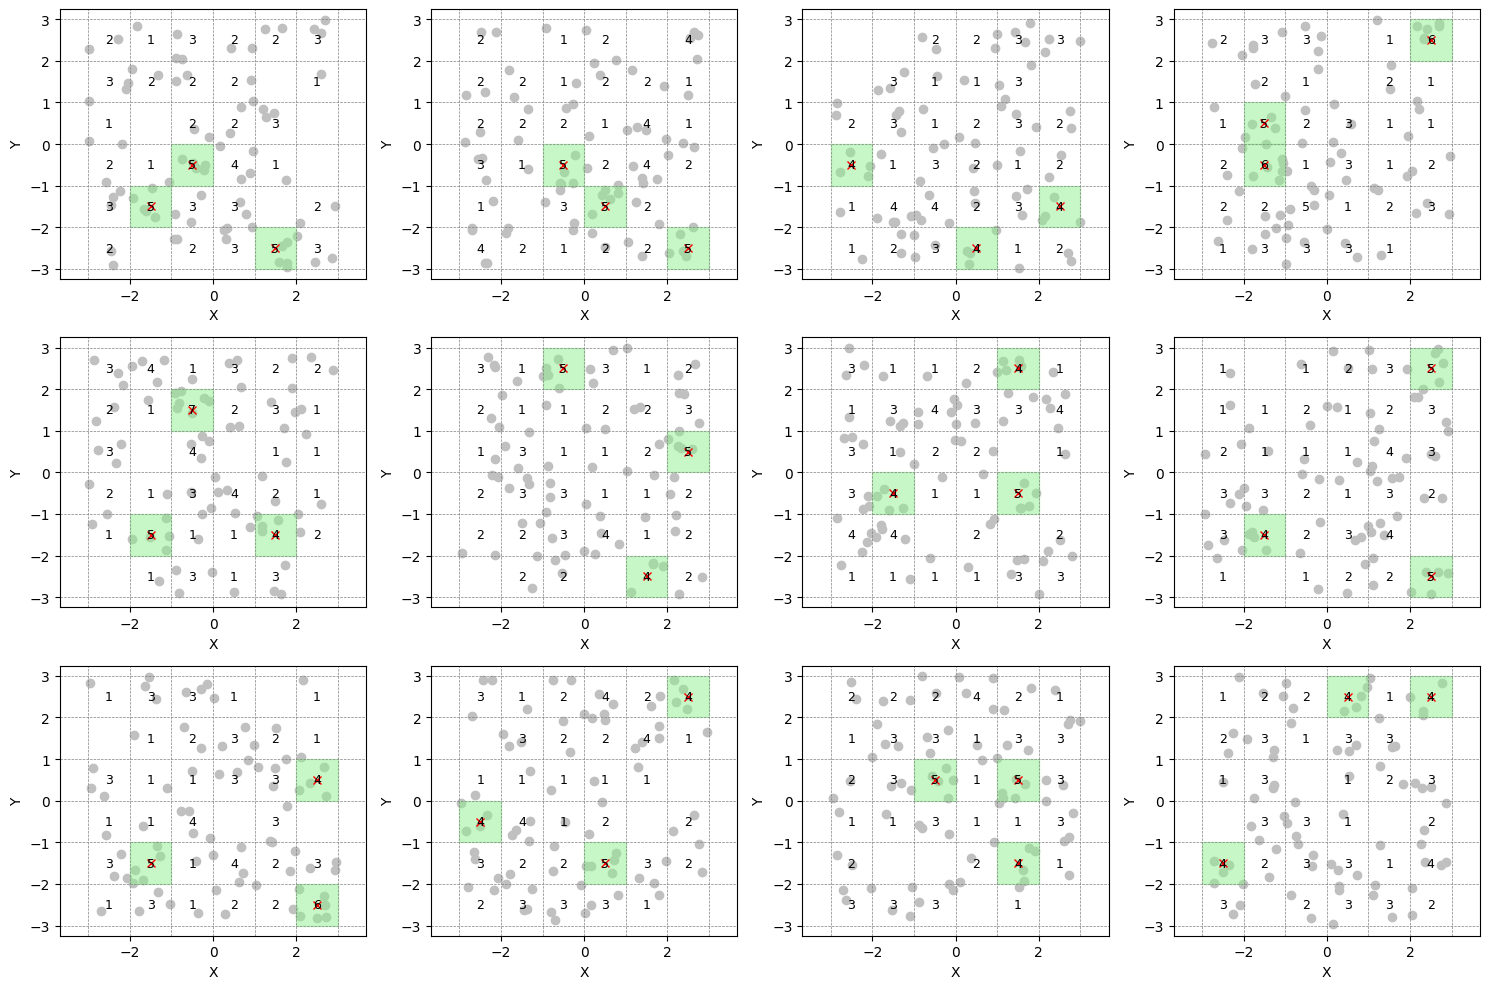

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate random clusters and plot them
def plot_random_clusters(ax):
    # Generate random data points
    num_points = 75
    x = np.random.uniform(-3, 3, num_points)
    y = np.random.uniform(-3, 3, num_points)

    # Calculate the number of points per 1x1 block
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3
    x_edges = np.arange(x_min, x_max+1, 1)
    y_edges = np.arange(y_min, y_max+1, 1)
    H, xedges, yedges = np.histogram2d(x, y, bins=(x_edges, y_edges))

    # Plot points
    ax.scatter(x, y, color='silver')

    # Adding coordinate lines for both x and y axes
    for line in range(-3, 4):  # Lines for -3 to 3
        ax.axhline(line, color='grey', linestyle='--', lw=0.5)
        ax.axvline(line, color='grey', linestyle='--', lw=0.5)

    # Find the indices of the 3 highest counts in H and highlight those blocks
    highest_counts_indices = np.unravel_index(np.argsort(H.ravel())[-3:], H.shape)
    for i, j in zip(highest_counts_indices[0], highest_counts_indices[1]):
        ax.fill_betweenx(y=[yedges[j], yedges[j+1]], x1=xedges[i], x2=xedges[i+1], color='lightgreen', alpha=0.5)
        # Calculate and plot the centroid of each highlighted block
        centroid_x = (xedges[i] + xedges[i+1]) / 2
        centroid_y = (yedges[j] + yedges[j+1]) / 2
        ax.plot(centroid_x, centroid_y, 'rx')  # Mark the centroid with a red "x"

    # Annotate each block with the count of points
    for i in range(len(xedges)-1):
        for j in range(len(yedges)-1):
            block_center_x = (xedges[i] + xedges[i+1]) / 2
            block_center_y = (yedges[j] + yedges[j+1]) / 2
            count = H[i, j]
            if count > 0:  # Only annotate blocks with at least one point
                ax.text(block_center_x, block_center_y, int(count), ha='center', va='center', fontsize=9)

    # Setting the plot limits and labels
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axis('equal')

# Generate 11 separate graphs
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
for i in range(3):
    for j in range(4):
        plot_random_clusters(axs[i, j])

plt.tight_layout()
plt.show()